In [749]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [750]:
m = 113.44

x_limit = 300
data_count = 20_000

x = x_limit * random.rand(data_count)
c = 3000

y = m*x + c

max = 460

In [751]:
y

array([10889.69377824, 36648.90770369, 12567.70824256, ...,
       20794.6413485 , 16813.5272768 , 30188.33575686])

In [752]:
y_inacc = []
r_inacc = []

data_correct = 300
while data_correct < data_count:
    r = np.random.normal(0,8)
    temp = y[data_correct] + (max)*r
    y_inacc.append(temp)
    r_inacc.append(r)
    data_correct += 1

In [753]:
y_inacc = np.array(y_inacc)

In [754]:
len(y_inacc)

19700

In [755]:
y = y[:-len(y_inacc)]
len(y)

300

In [756]:
y = np.concatenate((y, y_inacc))
y

array([10889.69377824, 36648.90770369, 12567.70824256, ...,
       25920.15850535, 18121.12086262, 32062.82179921])

In [757]:
len(y)

20000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


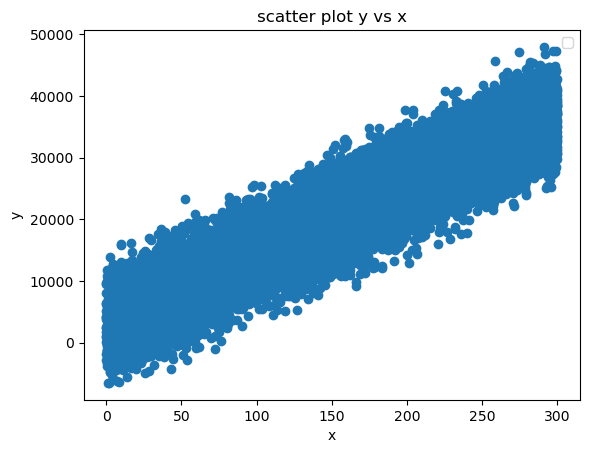

In [758]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('scatter plot y vs x')

plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

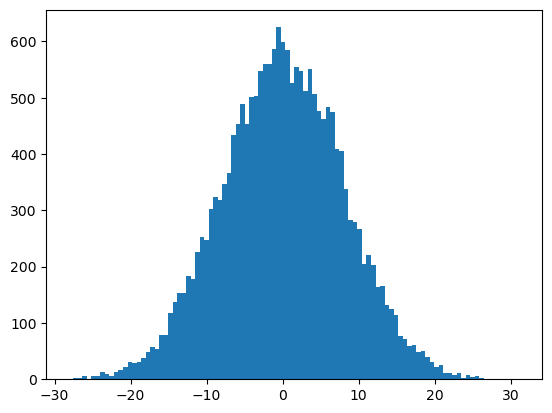

In [759]:
plt.hist(r_inacc,100)
plt.show

NOW REGRESSION TIME
===

In [760]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.25,
                                                    random_state=0)

print('Train size : ', x_train.shape)
print('Test size  : ', x_test.shape)

Train size :  (15000,)
Test size  :  (5000,)


In [761]:
x_train

array([ 61.09509473, 298.6437483 , 200.76207711, ..., 205.07546155,
        14.49939901, 217.47792679])

In [762]:
x_train = x_train.reshape(-1, 1)

In [763]:
x_train

array([[ 61.09509473],
       [298.6437483 ],
       [200.76207711],
       ...,
       [205.07546155],
       [ 14.49939901],
       [217.47792679]])

Method 3: Scikit-Learn

In [764]:
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)

print("formula from regression is: ")
print("y = ", linear_regression.coef_, "x + ", linear_regression.intercept_)
print("original: ")
print("y = ", m, "x + ", c)

formula from regression is: 
y =  [112.5447895] x +  3173.9786641640385
original: 
y =  113.44 x +  3000


MULTIVARIABLE LINEAR REGRESSION

In [765]:
m = 113.44
a = 10
b = 1000

x_limit = 300
x_1_limit = 4200
x_2_limit = 80
data_count = 20_000

x = x_limit * random.rand(data_count)
x_1 = x_1_limit * random.rand(data_count)
x_2 = x_2_limit * random.rand(data_count)
c = 3000

y = (m*x) + (a*x_1) + (b*x_2) + c

max = 460

In [766]:
y_inacc = []
r_inacc = []

data_correct = int(round(data_count * 0.01, 0))
while data_correct < data_count:
    r = np.random.normal(0,8)
    temp = y[data_correct] + (max)*r
    y_inacc.append(temp)
    r_inacc.append(r)
    data_correct += 1
    
y_inacc = np.array(y_inacc)
y = y[:-len(y_inacc)]
y = np.concatenate((y, y_inacc))
y

array([55998.53772328, 86384.69507174, 71202.88116859, ...,
       81573.84566353, 92883.82954   , 72228.41147662])

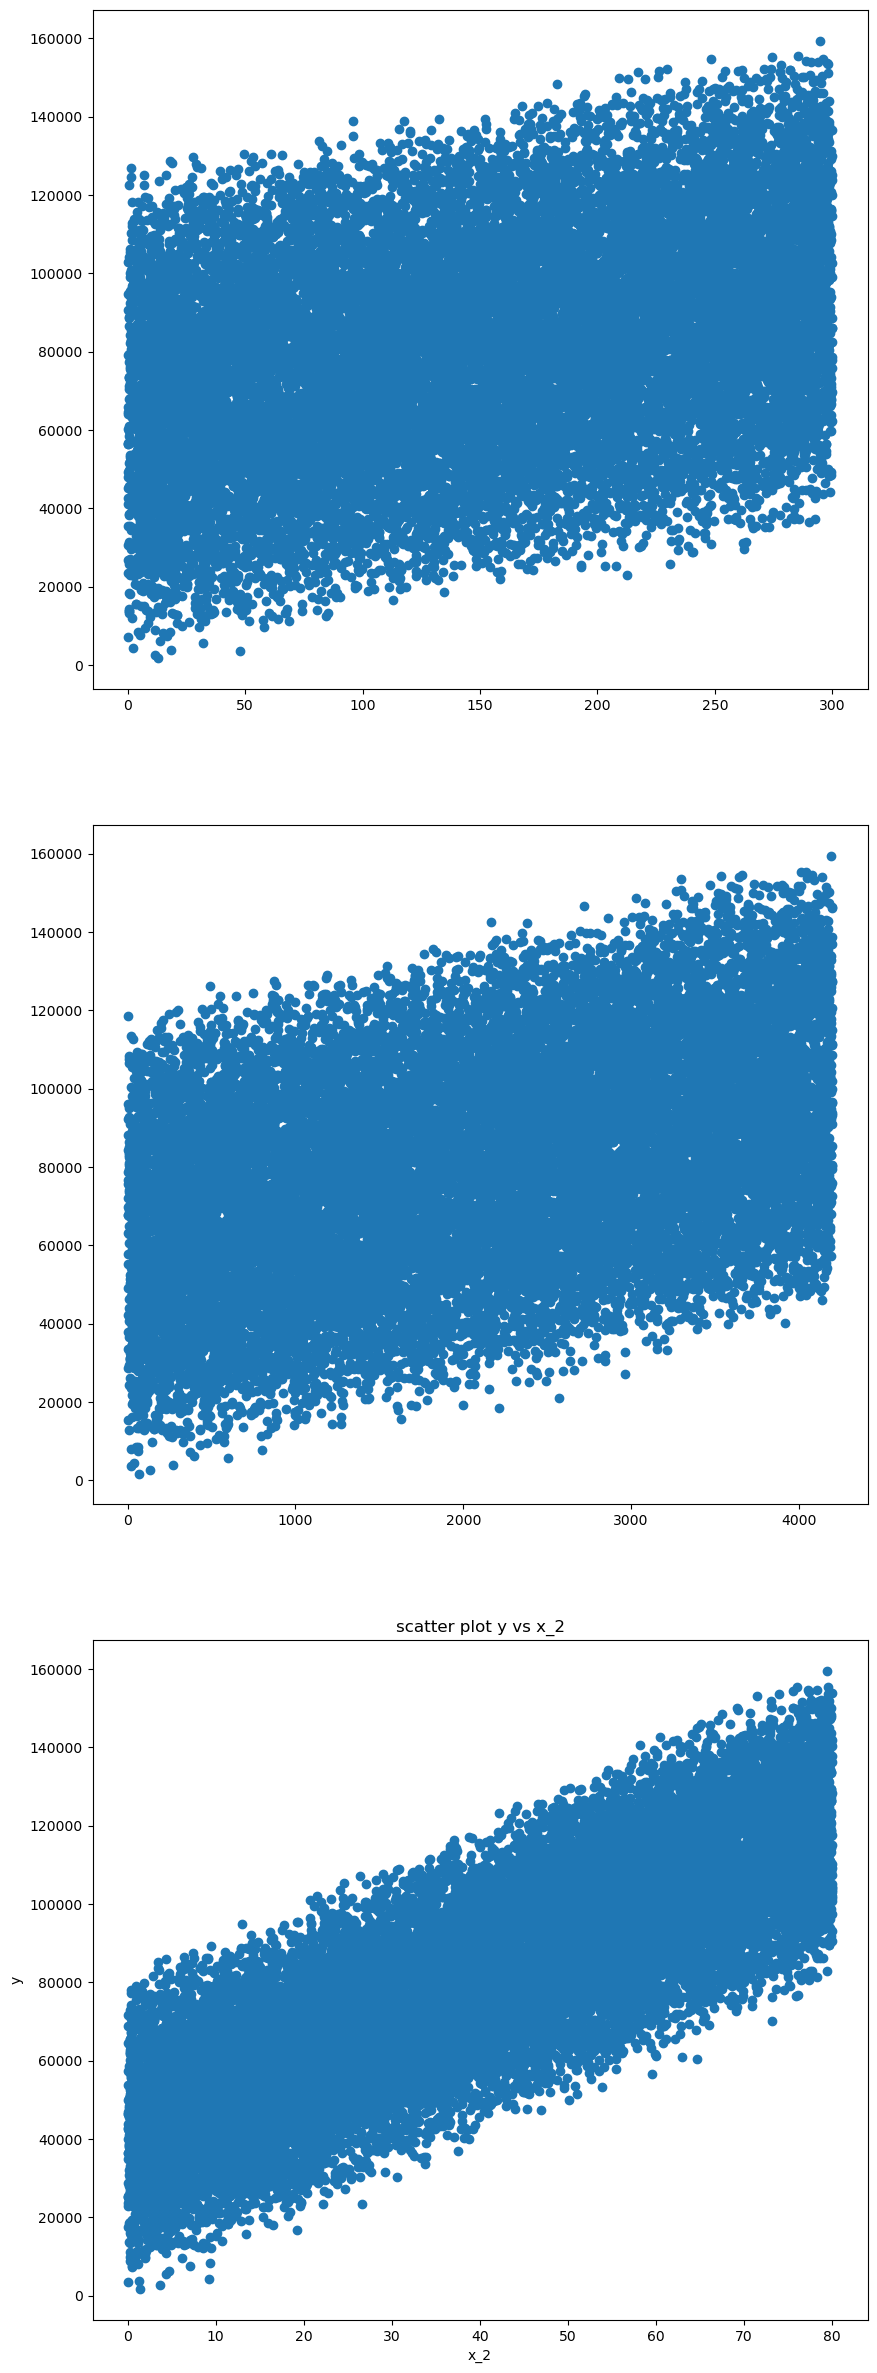

In [767]:
fig, ax = plt.subplots (3,1, figsize = (10,30))

ax[0].scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('scatter plot y vs x')

ax[1].scatter(x_1,y)
plt.xlabel('x_1')
plt.ylabel('y')
plt.title('scatter plot y vs x_1')

ax[2].scatter(x_2,y)
plt.xlabel('x_2')
plt.ylabel('y')
plt.title('scatter plot y vs x_2')

plt.show()

In [768]:
x_data = pd.DataFrame(
    {
        'x': x,
        'x_1': x_1,
        'x_2': x_2
    }
)
y_data = pd.DataFrame(y)

In [769]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,
                                                    test_size=0.25,
                                                    random_state=0)

print('Train size : ', x_train.shape)
print('Test size  : ', x_test.shape)

Train size :  (15000, 3)
Test size  :  (5000, 3)


In [770]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled.shape

(15000, 3)

In [771]:
model = LinearRegression()
model.fit(x_train_scaled,y_train)

coeff = model.coef_
coeff = list(np.concatenate(coeff))
intercept = model.intercept_

coeff_list = {
    'feature': x_train.columns.tolist(),
    'coefficient': coeff
}

print('Intercept : ', intercept)
coeff_list = pd.DataFrame(coeff_list)

Intercept :  [80739.77045755]


In [772]:
coeff_list

,feature,coefficient
0,x,9890.593679
1,x_1,12072.432431
2,x_2,23067.821948


In [773]:
print("m: ", m)
print("a: ", a)
print("b: ", b)

m:  113.44
a:  10
b:  1000


if i use model.fit(x_train,y_train) it works
if i use model.fit(x_train_scaled,y_train) it doesnt
coefficient become very wrong

In [774]:
y_train_predict = model.predict(x_train_scaled)
y_test_predict = model.predict(x_test_scaled)

print('MAE - Train Set  : ', mean_absolute_error(y_train, y_train_predict))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_test_predict))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_train_predict))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_test_predict))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_train_predict, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_test_predict, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_train_predict))
print('R2 Score - Test Set  : ', r2_score(y_test, y_test_predict))
print('')

MAE - Train Set  :  2908.4698552633736
MAE - Test Set   :  2908.532030252731

MSE - Train Set  :  13372412.66052501
MSE - Test Set   :  13510098.511732584

RMSE - Train Set :  3656.830958702495
RMSE - Test Set  :  3675.608590659863

R2 Score - Train Set :  0.9830510717083687
R2 Score - Test Set  :  0.9831231349941341



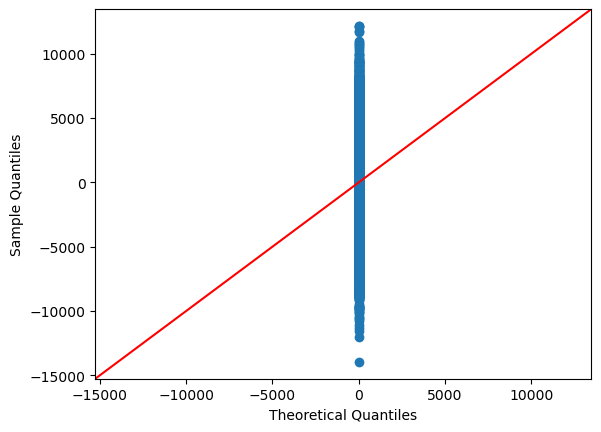

In [775]:
y_test_residuals = y_test - y_test_predict

sm.qqplot(y_test_residuals, line='45')
plt.show()